In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE,RFECV
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,classification_report

In [74]:
# Download the file
output_file = 'Merged.csv'

# Read the downloaded CSV file into a pandas DataFrame
data = pd.read_csv(output_file)

# Display the first few rows of the dataframe
print(data.head())

# Create a copy of the dataframe
df = data.copy()


   Survey ID   Age  Gender     Ethnicity Marital Status  Education Completed  \
0    1011601  23.0  Female       Chinese         Single                 16.0   
1      10786  34.0  Female  Asian Indian        Married                 17.0   
2      10809  28.0    Male  Asian Indian        Married                 17.0   
3      10856  25.0    Male  Asian Indian         Single                 17.0   
4      10103  60.0  Female  Asian Indian         Single                 17.0   

   Household Size Household Category Full Time Employment  \
0             3.0             Family                   No   
1             3.0             Family                  Yes   
2             2.0             Family                  Yes   
3             1.0              Alone                  Yes   
4             3.0             Family                   No   

  Part Time Employment Student Homemaker Retired             Income US Born  \
0                   No      No        No      No        $0 - $9,999      

In [75]:
#df = pd.read_csv('Merged.csv')

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
df.head()

,Survey ID,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement,Quality of Life
0,1011601,23.0,Female,Chinese,Single,16.0,3.0,Family,No,No,No,No,No,"$0 - $9,999",No,11.0,Yes,Well,Much,Low,Very high,Very close,Not very much,No,Very Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,Yes,0,0,0,Yes,0,0,0,0,0,0,0,Yes,English,Yes,Yes,No,No,Yes,No,No,No,No,Yes,No,Disagree,Disagree,No,0,No,0,0,0,0,0,Yes,Yes,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0_1.0,0,2.000000,4.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Own,Pretty much,No,Yes,No,Yes,Yes,Yes,No,Not interested,Somewhat dissatisfied,1,1,2,1,Public Transportation,Aware,Not Engaged,8.0
1,10786,34.0,Female,Asian Indian,Married,17.0,3.0,Family,Yes,No,No,No,No,"$70,000 and over",No,1.0,Yes,Very well,Not at all,Very high,High,Very close,Very much,No,Excellent,Excellent,Excellent,Yes,No,No,Yes,Yes,0,No,No,0,No,0,No,No,No,No,Yes,Yes,0,0,Yes,Yes,Yes,0,0,0,0,0,0,English,Yes,Yes,No,No,No,No,No,No,No,No,No,Slightly agree,Agree,No,0,No,0,0,0,0,0,0,0,0,0,Yes,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0_1.0,0,3.000000,3.0,2.5,3.0,3.0,3.0,3.0,2.75,2.0,5.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,One-family house,Own,Pretty much,No,Yes,Yes,No,Yes,Yes,No,Somewhat interested,Niether satisfied or dissatisfied,1,1,0,0,Car,Aware,Not Engaged,5.0
2,10809,28.0,Male,Asian Indian,Married,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,7.0,No,W

In [78]:
df.shape

(2565, 148)

In [79]:
df.drop(columns='Survey ID',axis=1, inplace=True)

In [80]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Completed',
       'Household Size', 'Household Category', 'Full Time Employment',
       'Part Time Employment', 'Student',
       ...
       'Informed', 'City Effort Satisfaction', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Mode of Transport',
       'Awareness of Services', 'Civic Engagement', 'Quality of Life'],
      dtype='object', length=147)

In [81]:
df_num = df.select_dtypes(include=['int64','float64']).columns

In [82]:
df_num

Index(['Age', 'Education Completed', 'Household Size', 'Duration of Residency',
       'Knowledge', 'Education (AD)', 'Services (AD)', 'Language Barrier (AD)',
       'Aging (AD)', 'Avoidance (AD)', 'Nursing Home (AD)',
       'Advanced Directives', 'Have an Advanced Directive', 'Superstition',
       'Concern for Self & Others (AD)', 'Planning and Preparedness',
       'Fate (AD) and Embarrassing (AD)', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ',
       '3-1-1_9-1-1', 'City-based', 'Non-city-based Ethnic',
       'Non-city-based General', 'Quality of Life'],
      dtype='object')

In [83]:
df_num = ['Age', 'Education Completed', 'Household Size',
       'Duration of Residency', 'Family Connectivity Score',
       'Friends Connectivity Score', 'Religious Connectivity Score',
       'Family Relationship Score', 'Family Values Score',
       'Family Expression Score', 'Family Dynamics Score',
       'Community Engagement Score', 'Community Trust Score', 'Residency ']

In [84]:
# Convert all columns except those in df_num to categorical
for col in df.columns:
    if col not in df_num:
        df[col] = df[col].astype('object')

# Check if conversion was successful
print(df.dtypes)


Age                       float64
Gender                     object
Ethnicity                  object
Marital Status             object
Education Completed       float64
                           ...   
Non-city-based General     object
Mode of Transport          object
Awareness of Services      object
Civic Engagement           object
Quality of Life            object
Length: 147, dtype: object


In [85]:
df_cat = df.select_dtypes(include=['object','category']).columns

In [86]:
for i in df_cat:
    print(df[i].value_counts())
    print('\n')


Gender
Female    1421
Male      1144
Name: count, dtype: int64


Ethnicity
Chinese         630
Asian Indian    568
Vietnamese      495
Korean          467
Filipino        262
Other           143
Name: count, dtype: int64


Marital Status
Married                  1717
Single                    717
Living with a partner     102
Other                      29
Name: count, dtype: int64


Household Category
Family                 2035
With Friends            235
Alone                   208
Other                    69
Family with Friends      18
Name: count, dtype: int64


Full Time Employment
No     1435
Yes    1130
Name: count, dtype: int64


Part Time Employment
No     2303
Yes     262
Name: count, dtype: int64


Student
No     2168
Yes     397
Name: count, dtype: int64


Homemaker
No     2310
Yes     255
Name: count, dtype: int64


Retired
No     2247
Yes     318
Name: count, dtype: int64


Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,

In [87]:
len(df_cat) + len(df_num)

147

## RESPONSE VARIABLE

In [88]:
y = df['Quality of Life']

In [89]:
class_counts = y.value_counts()
class_counts

Quality of Life
8.0     783
7.0     486
9.0     435
10.0    344
6.0     218
5.0     211
4.0      48
3.0      23
2.0      11
1.0       4
0.0       2
Name: count, dtype: int64

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_28176\1875128982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


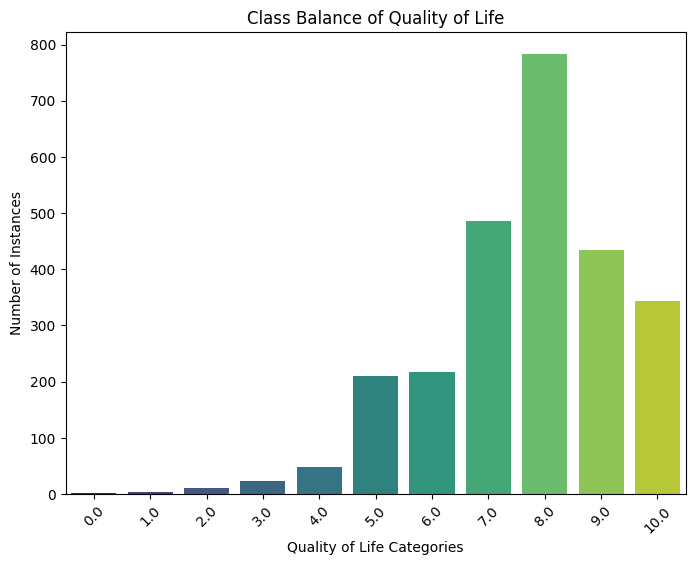

In [90]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Balance of Quality of Life')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

#Encode type I
Yes
No  

#Encode type II
Pretty much satisfied     
Very much satisfied        
Not very much satisfied     
Never used                 
Not at all satisfied        

#Encode type III
Never               
Rarely              
Some of the time     
Often               
     
#Encode type IV
Somewhat interested      
Interested               
Not interested            
Very interested           
Not interested at all     


#Encode type V
Niether satisfied or dissatisfied    
Somewhat satisfied                   
Somewhat dissatisfied                
Very satisfied                        
Very dissatisfied                      

#Encode type VI
Good        
Excellent     
Fair        
Poor       

Ordinal
Income
$70,000 and over     1174
$0 - $9,999           245
$30,000 - $39,999     202
$10,000 - $19,999     202
$20,000 - $29,999     194
$60,000 - $69,999     189
$50,000 - $59,999     177
$40,000 - $49,999     175
Name: count, dtype: int64

#Encoding VII
Other Encodings
Value counts for column 'Housing ':
Housing
One-family house                     1382
Apartment/ Townhouse/ Condominium    1006
Two-family house/ duplex               69
Other                                  58
Mobile house                           24
Name: count, dtype: int64

Value counts for column 'Status of Ownership':
Status of Ownership
Own      1350
Rent     1104
Other      78
Name: count, dtype: int64

Value counts for column 'Other Transportation':
Other Transportation
0.0    2512
1.0      26
Name: count, dtype: int64

**Quality of Life variable mapping**

In [91]:
y = df['Quality of Life']

In [92]:
X = df.drop(columns=['Quality of Life'],axis=1)

In [93]:
def recategorize_quality_of_life(value):
    if value in [0, 1, 2, 3]:
        return 0
    elif value in [4, 5, 6, 7]:
        return 1
    elif value in [8, 9, 10]:
        return 2
    else:
        return None

In [94]:
df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_28176\960290738.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Quality of Life Category'] = y.apply(recategorize_quality_of_life)


In [95]:
y = df['Quality of Life Category']

In [96]:
class_counts_new = df['Quality of Life Category'].value_counts()
class_counts_new

Quality of Life Category
2    1562
1     963
0      40
Name: count, dtype: int64

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_28176\3113716066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)


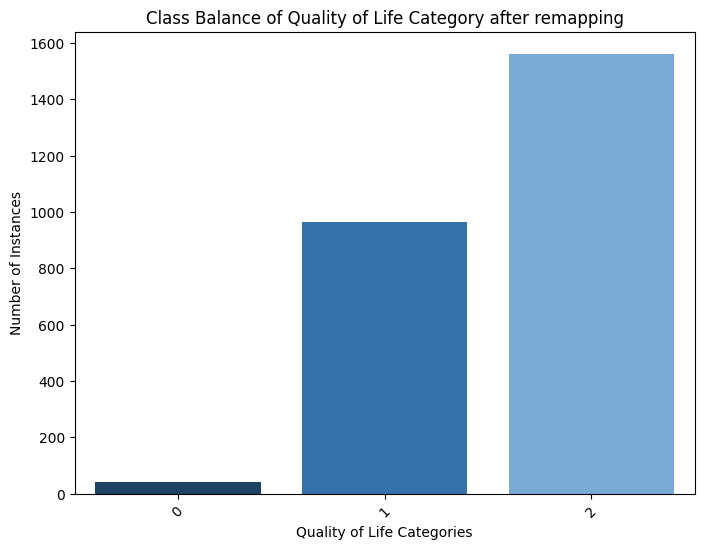

In [97]:
# Define your custom palette with dark blue, dark green, and light green#12436D
custom_palette = sns.color_palette(["#12436D", "#2073BC", "#6BACE6"])  # Dark blue, dark green, light green
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_new.index, y=class_counts_new.values, palette=custom_palette)
plt.title('Class Balance of Quality of Life Category after remapping')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [98]:
cat_df = X.select_dtypes(include=['object'])

In [99]:
from sklearn.model_selection import train_test_split

# X is the feature dataframe and y is the target variable (categorical)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Quality of Life Category'], random_state=42)


## Checking the significance of Categorical variables using Chi_Squared Test

In [100]:
import pandas as pd
from scipy.stats import chi2_contingency

# Initialize a list to store the results
chi_square_results = []

# Loop through all categorical variables (assuming X is your data and y is your target variable)
for column in X_train[cat_df.columns].columns:
    if X_train[column].dtype == 'object':  # Check if the column is categorical
        # Create a contingency table for the categorical variable and the response (y)
        contingency_table = pd.crosstab(X_train[column], y_train)

        # Perform the Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        # Append the result for the variable
        chi_square_results.append({
            'Variable': column,
            'Chi2 Statistic': chi2,
            'P-Value': p_value,
            'Significant (p < 0.05)': 'Yes' if p_value < 0.05 else 'No'
        })

# Convert the results into a pandas DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Sort the results by p-value for easy identification of significant variables
chi_square_df = chi_square_df.sort_values(by='P-Value')

# Display the table
print(chi_square_df)

                 Variable  Chi2 Statistic        P-Value  \
62  Satisfied With Life 1      607.836078  2.248299e-122   
63  Satisfied With Life 2      576.981938  8.689805e-116   
20  Present Mental Health      411.462298   6.609890e-84   
19         Present Health      284.747768   7.229869e-57   
12       English Speaking      266.544040   1.190316e-54   
..                    ...             ...            ...   
66   Therapist/Counselor         0.000000   1.000000e+00   
36                   COPD        0.000000   1.000000e+00   
64           Psychiatrist        0.000000   1.000000e+00   
34         Kidney Problem        0.000000   1.000000e+00   
33              Hepatitis        0.000000   1.000000e+00   

   Significant (p < 0.05)  
62                    Yes  
63                    Yes  
20                    Yes  
19                    Yes  
12                    Yes  
..                    ...  
66                     No  
36                     No  
64                     No  

In [101]:
import pandas as pd
from scipy.stats import chi2_contingency

significant_vars = []

for col in X_train[cat_df.columns].columns:
    contingency_table = pd.crosstab(y, X_train[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    if p < 0.05:  # Adjust the significance level as needed
        significant_vars.append(col)

print("Significant variables:", significant_vars)


Significant variables: ['Ethnicity', 'Marital Status', 'Full Time Employment', 'Retired', 'Income', 'US Born', 'Primary Language', 'English Speaking', 'English Difficulties', 'Familiarity with America', 'Familiarity with Ethnic Origin', 'Identify Ethnically', 'Belonging', 'Present Health', 'Present Mental Health', 'Present Oral Health', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'Language', 'users', 'Heal Professionals', 'Health Website', 'Satisfied With Life 1', 'Satisfied With Life 2', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'Knowledge', 'Services (AD)', 'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives', 'Have

## Checking the significance of Numerical variables using Kruskal Wallis

In [102]:
import pandas as pd
from scipy.stats import kruskal

# Initialize an empty list to hold significant variables
significant_num = []

# Loop through each numeric variable and perform the Kruskal-Wallis test
for var in df_num:
    grouped = [X_train[var][y == group] for group in sorted(y.unique())]
    stat, p_value = kruskal(*grouped)

    print(f"Variable: {var}")
    print(f"Kruskal-Wallis test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check significance (using alpha = 0.05)
    if p_value < 0.05:
        print(f"{var} is significantly associated with the ordinal response.\n")
        significant_num.append(var)  # Add to significant_num list
    else:
        print(f"{var} is not significantly associated with the ordinal response.\n")

# Display the significant variables
print("Significant numeric variables:", significant_num)

Variable: Age
Kruskal-Wallis test statistic: 18.196205647126533
P-value: 0.00011187785931608364
Age is significantly associated with the ordinal response.

Variable: Education Completed
Kruskal-Wallis test statistic: 46.39854855722465
P-value: 8.407815957179509e-11
Education Completed is significantly associated with the ordinal response.

Variable: Household Size
Kruskal-Wallis test statistic: 1.1485113714206547
P-value: 0.5631238539906636
Household Size is not significantly associated with the ordinal response.

Variable: Duration of Residency
Kruskal-Wallis test statistic: 46.06715993953099
P-value: 9.923007523987634e-11
Duration of Residency is significantly associated with the ordinal response.

Variable: Family Connectivity Score
Kruskal-Wallis test statistic: 7.775734876683675
P-value: 0.020488993522920763
Family Connectivity Score is significantly associated with the ordinal response.

Variable: Friends Connectivity Score
Kruskal-Wallis test statistic: 3.2625248442120234
P-valu

In [103]:
len(significant_vars)+len(significant_num)

102

## Nominal variables

In [104]:
cat_df = significant_vars

In [105]:
#Encoding Yes and No columns into Nominal type 1
nominal_type1 = []
# Iterate through the columns in cat_df
for col in cat_df:
    if (X[col].isin(['Yes', 'No'])).any():  # Check if any entry is 'Yes' or 'No'
        nominal_type1.append(col)

# Print the Type I encoding columns
print(f'Type I encoding:', nominal_type1)

#Encode categories with Other
nominal_type2 = []
for col in cat_df:
    if (X[col] == 'Other').any():
        nominal_type2.append(col)
print(f'type_nominal_1 encoding:',nominal_type2)


Type I encoding: ['Full Time Employment', 'Retired', 'US Born', 'Primary Language', 'Hygiene Assistance', 'Smoking', 'Drinking', 'Regular Exercise', 'Healthy Diet', 'Hypertension', 'Arthritis', 'Physical Check-up', 'Dentist Check-up', 'Primary Care', 'Health Insurance', 'Dental Insurance', 'Unmet Health Need', 'Unmet Dental Needs', 'Transportation (Medical)', 'Interpretation (Medical)', 'Comunication Problem', 'Preferance', 'users', 'Heal Professionals', 'Health Website', 'Weakness', 'Shame', 'Disappointment', 'Disclosure', 'Danger', 'Recovery', 'Treatment', 'Preference', 'District', 'Nursing Home', 'Smoke Detector', 'Recycle', 'Access to a Computer', 'Mobile Devices']
type_nominal_1 encoding: ['Ethnicity', 'Marital Status', 'Housing ', 'Status of Ownership']


## Ordinal Variables

In [106]:
#Encode type I
type1_columns = []
for col in cat_df:
    if (X[col] == 'Pretty much satisfied').any():
        type1_columns.append(col)
print(f'Type II encoding:',type1_columns)

#Encode type II

type2_columns = []
for col in cat_df:
    if (X[col] == 'Rarely').any():
        type2_columns.append(col)
print(f'Type III encoding:',type2_columns)

#Encode type III
type3_columns = []
for col in cat_df:
    if (X[col] == 'Interested').any():
        type3_columns.append(col)
print(f'Type IV encoding:',type3_columns)

#Encode type IV
type4_columns = []
for col in cat_df:
    if (X[col] == 'Very satisfied').any():
        type4_columns.append(col)
print(f'Type V encoding:',type4_columns)

#Encode type V
type5_columns = []
for col in cat_df:
    if (X[col] == 'Excellent').any():
        type5_columns.append(col)
print(f'Type VI encoding:',type5_columns)



Type II encoding: ['Parks and Recs', 'Libraries', 'Public Safety', 'Airport', 'Austin Energy', 'Court', 'Social Services']
Type III encoding: ['Visit Frequency ']
Type IV encoding: ['Informed']
Type V encoding: ['City Effort Satisfaction']
Type VI encoding: ['Present Health', 'Present Mental Health', 'Present Oral Health', 'Place to Live', 'Raising Children', 'Place to Work', 'Small Businesses ', 'Place to Retire', 'Arts and Culture', 'Safety', 'Traffic', 'Qualtiy of Life', 'Quality of Service']


In [107]:
X_train_new =X_train[significant_vars+significant_num]
X_test_new = X_test[significant_vars+significant_num]

In [108]:
'''from lazypredict.Supervised import LazyClassifier

# Instantiate LazyClassifier with updated arguments
clf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)

# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new
models, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)

print(models)'''

'from lazypredict.Supervised import LazyClassifier\n\n# Instantiate LazyClassifier with updated arguments\nclf = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)\n\n# Assuming you have already prepared your data: X_train_new, X_test_new, y_train_new, y_test_new\nmodels, predictions = clf.fit(X_train_new, X_test_new, y_train, y_test)\n\nprint(models)'

In [109]:
ordinal_cols = type1_columns+type2_columns+type3_columns+type4_columns+type5_columns
nominal_cols = nominal_type1+nominal_type2

identified_cols = ordinal_cols+nominal_cols

# Display columns that are not in the exclude list
no_type_cols = X[cat_df].columns[~X[cat_df].columns.isin(identified_cols)]

In [110]:
cat_col = X.select_dtypes(include=['object'])

In [111]:
cat_col [identified_cols]

,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Visit Frequency,Informed,City Effort Satisfaction,Present Health,Present Mental Health,Present Oral Health,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Full Time Employment,Retired,US Born,Primary Language,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Arthritis,Physical Check-up,Dentist Check-up,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,users,Heal Professionals,Health Website,Weakness,Shame,Disappointment,Disclosure,Danger,Recovery,Treatment,Preference,District,Nursing Home,Smoke Detector,Recycle,Access to a Computer,Mobile Devices,Ethnicity,Marital Status,Housing,Status of Ownership
0,Pretty much satisfied,Pretty much satisfied,Never used,Never used,Pretty much satisfied,Never used,Never used,Never,Not interested,Somewhat dissatisfied,Very Good,Good,Good,Good,Good,Good,Good,Good,Good,Good,Poor,Good,Good,No,No,No,Yes,No,No,No,No,Yes,0,0,Yes,0,Yes,0,0,0,0,0,0,0,Yes,Yes,Yes,Yes,0,0,0,0,Yes,0,0,0,No,No,Yes,No,Yes,Yes,Chinese,Single,Apartment/ Townhouse/ Condominium,Own
1,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,Yes,Yes,No,No,Yes,Yes,0,0,Yes,Yes,Yes,Yes,Yes,0,0,0,0,0,0,Yes,No,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Married,One-family house,Own
2,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Very Good,Very Good,Very Good,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,No,No,No,No,Yes,No,0,0,Yes,Yes,0,Yes,Yes,0,0,0,Yes,0,0,Yes,No,Yes,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Married,One-family house,Own
3,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Somewhat interested,Niether satisfied or dissatisfied,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,Yes,No,No,No,No,Yes,No,Yes,Yes,0,0,Yes,Yes,Yes,Yes,Yes,0,0,Yes,0,0,0,Yes,Yes,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Single,One-family house,Own
4,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Never,Interested,Niether satisfied or dissatisfied,Good,Excellent,Very Good,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Good,No,Yes,No,Yes,No,No,No,Yes,Yes,0,Yes,Yes,Yes,0,Yes,Yes,0,0,0,0,0,0,Yes,Yes,No,0,0,0,0,0,0,0,0,No,No,Yes,Yes,Yes,Yes,Asian Indian,Single,One-family house,Own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,Very much satisfied,Very much satisfied,Very much satisfied,Pretty much satisfied,Very much satisfied,Pretty much satisfied,Pretty much satisfied,Often,Interested,Somewhat satisfied,Very Good,Excellent,Very Good,Excellent,Excellent,Excellent,Good,Good,Good,Good,Good,Good,Good,No,Yes,No,Yes,No,No,No,Yes,Yes,Yes,0,Yes,Yes,Yes,Yes,Yes,0,0,0,0,0,0,Yes,Yes,Yes,0,0,0,0,0,0,0,0,Yes,No,Yes,Yes,Yes,Yes,Other,Single,One-family house,Other
2561,Very much satisfied,Very much satisfied,Very much satisfied,Pretty much satisfied,Not very much satisfied,Not very much satisfied,Pretty much satisfied,Often,Somewhat 

In [112]:
cat_col [no_type_cols]

,Income,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Language,Satisfied With Life 1,Satisfied With Life 2,Knowledge,Services (AD),Language Barrier (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Satisfaction With Housing.,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Awareness of Services,Civic Engagement
0,"$0 - $9,999",Well,Much,Low,Very high,Very close,Not very much,English,Disagree,Disagree,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Pretty much,1,1,2,1,Aware,Not Engaged
1,"$70,000 and over",Very well,Not at all,Very high,High,Very close,Very much,English,Slightly agree,Agree,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,0,0,Aware,Not Engaged
2,"$70,000 and over",Well,Much,High,High,Somewhat close,Not very much,English,Slightly agree,Agree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,0,0,0,Aware,Not Engaged
3,"$50,000 - $59,999",Very well,Not at all,Very high,Low,Not very close,Not very much,English,Strongly agree,Strongly agree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,0,0,Aware,Not Engaged
4,"$70,000 and over",Very well,Not at all,Low,High,Not very close,Not very much,English,Agree,Agree,2.0,0.0,0.0,1.0,1.0,1.0,0.0,Very much,1,1,1,1,Aware,Not Engaged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,"$30,000 - $39,999",Well,Not much,High,Very high,Somewhat close,Somewhat,Eng_Chinese only,Agree,Agree,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Pretty much,1,1,2,3,Aware,Engaged
2561,"$60,000 - $69,999",Well,Not at all,High,High,Not at all,Somewhat,English,Neither agree or disagree,Agree,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Very much,2,4,2,2,Aware,Engaged
2562,"$10,000 - $19,999",Well,Much,High,High,Somewhat close,Somewhat,English,Agree,Agree,2.0,0.0,0.0,0.0,1.0,1.0,3.0,Very much,1,1,0,0,Aware,Not Engaged
2563,"$10,000 - $19,999",Not well,Much,Low,Low,Somewhat close,Somewhat,English,Agree,Agree,3.0,0.0,0.0,0.0,1.0,1.0,3.0,Pretty much,2,2,2,1,Aware,Engaged


In [113]:
rem = cat_col [no_type_cols].columns
rem

Index(['Income', 'English Speaking', 'English Difficulties',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Belonging', 'Language', 'Satisfied With Life 1',
       'Satisfied With Life 2', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition',
       'Satisfaction With Housing.', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General',
       'Awareness of Services', 'Civic Engagement'],
      dtype='object')

In [114]:
nominal_type3 = ['Language', 'Knowledge', 'Services (AD)',
       'Language Barrier (AD)', 'Nursing Home (AD)', 'Advanced Directives',
       'Have an Advanced Directive', 'Superstition', '3-1-1_9-1-1', 'City-based',
       'Non-city-based Ethnic', 'Non-city-based General', 'Awareness of Services', 'Civic Engagement']

In [115]:
difference = np.setdiff1d(rem, nominal_type3)
cat_col[difference]

,Belonging,English Difficulties,English Speaking,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Income,Satisfaction With Housing.,Satisfied With Life 1,Satisfied With Life 2
0,Not very much,Much,Well,Low,Very high,Very close,"$0 - $9,999",Pretty much,Disagree,Disagree
1,Very much,Not at all,Very well,Very high,High,Very close,"$70,000 and over",Pretty much,Slightly agree,Agree
2,Not very much,Much,Well,High,High,Somewhat close,"$70,000 and over",Pretty much,Slightly agree,Agree
3,Not very much,Not at all,Very well,Very high,Low,Not very close,"$50,000 - $59,999",Pretty much,Strongly agree,Strongly agree
4,Not very much,Not at all,Very well,Low,High,Not very close,"$70,000 and over",Very much,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...
2560,Somewhat,Not much,Well,High,Very high,Somewhat close,"$30,000 - $39,999",Pretty much,Agree,Agree
2561,Somewhat,Not at all,Well,High,High,Not at all,"$60,000 - $69,999",Very much,Neither agree or disagree,Agree
2562,Somewhat,Much,Well,High,High,Somewhat close,"$10,000 - $19,999",Very much,Agree,Agree
2563,Somewhat,Much,Not well,Low,Low,Somewhat close,"$10,000 - $19,999",Pretty much,Agree,Agree


In [116]:
cat_col[difference].columns

Index(['Belonging', 'English Difficulties', 'English Speaking',
       'Familiarity with America', 'Familiarity with Ethnic Origin',
       'Identify Ethnically', 'Income', 'Satisfaction With Housing.',
       'Satisfied With Life 1', 'Satisfied With Life 2'],
      dtype='object')

In [117]:
for col in difference:
    print(cat_col [col].value_counts())

Belonging
Somewhat         1286
Very much         755
Not very much     441
Not at all         83
Name: count, dtype: int64
English Difficulties
Not at all    796
Not much      723
Much          541
Very much     505
Name: count, dtype: int64
English Speaking
Very well     980
Well          798
Not well      619
Not at all    168
Name: count, dtype: int64
Familiarity with America
High         1249
Low           709
Very high     490
Very low      117
Name: count, dtype: int64
Familiarity with Ethnic Origin
High         1374
Very high     854
Low           288
Very low       49
Name: count, dtype: int64
Identify Ethnically
Somewhat close    1228
Very close        1023
Not very close     286
Not at all          28
Name: count, dtype: int64
Income
$70,000 and over     1175
$0 - $9,999           246
$10,000 - $19,999     203
$30,000 - $39,999     202
$20,000 - $29,999     195
$60,000 - $69,999     190
$50,000 - $59,999     177
$40,000 - $49,999     177
Name: count, dtype: int64
Satisfactio

In [118]:
type6_columns=['English Difficulties']
type7_columns= ['English Speaking']
type8_columns=['Familiarity with America', 'Familiarity with Ethnic Origin']
type9_columns=['Identify Ethnically']
type10_columns=['Income']
type11_columns= ['Satisfied With Life 1', 'Satisfied With Life 2']
type12_columns=['Belonging']
type13_columns=['Satisfaction With Housing.']

In [119]:
# Define custom orders for each categorical column
custom_orders = {
    'type1_columns': ['Pretty much satisfied', 'Very much satisfied', 'Never used', 'Not very much satisfied', 'Not at all satisfied'],
    'type2_columns': ['Never', 'Rarely', 'Some of the time', 'Often'],
    'type3_columns': ['Not interested at all', 'Not interested', 'Somewhat interested', 'Interested', 'Very interested'],
    'type4_columns': ['Niether satisfied or dissatisfied', 'Somewhat dissatisfied', 'Somewhat satisfied', 'Very dissatisfied', 'Very satisfied'],
    'type5_columns': ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],
    'type6_columns': ['Not at all', 'Not much', 'Much', 'Very much'],
    'type7_columns': ['Not at all','Well','Not well','Very well'],
    'type8_columns': ['Very low','Low','High','Very high'],
    'type9_columns': ['Not at all','Not very close', 'Somewhat close', 'Very close'],
    'type10_columns': ['$0 - $9,999', '$10,000 - $19,999', '$20,000 - $29,999',  '$30,000 - $39,999', '$40,000 - $49,999', '$50,000 - $59,999', '$60,000 - $69,999' '$70,000 and over'],
    'type11_columns': ['Strongly disagree','Disagree','Slightly disagree','Neither agree or disagree','Slightly agree','Agree','Strongly agree'],
    'type12_columns': ['Not at all', 'Not very much', 'Somewhat', 'Very much'],
    'type13_columns': ['Not at all', 'Not very much', 'Pretty much', 'Very much']
}


In [120]:
X_test.head(4)

,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Household Category,Full Time Employment,Part Time Employment,Student,Homemaker,Retired,Income,US Born,Duration of Residency,Primary Language,English Speaking,English Difficulties,Familiarity with America,Familiarity with Ethnic Origin,Identify Ethnically,Belonging,Discrimination,Present Health,Present Mental Health,Present Oral Health,Hygiene Assistance,Smoking,Drinking,Regular Exercise,Healthy Diet,Hypertension,Heart Disease,Stroke,Diabetes,Cancer,Arthritis,Hepatitis,Kidney Problem,Asthma,COPD,Physical Check-up,Dentist Check-up,Urgentcare,Folkmedicine,Primary Care,Health Insurance,Dental Insurance,Unmet Health Need,Unmet Dental Needs,Transportation (Medical),Interpretation (Medical),Comunication Problem,Preferance,Language,users,Family,Close Friend,Acquaintances,Heal Professionals,Mobile Apps,Email,Social Networks,Online Communities,Health Website,Other,Satisfied With Life 1,Satisfied With Life 2,Psychiatrist,General Practitioner,Therapist/Counselor,Religious Leader,Weakness,Shame,Disappointment,Disclosure,Antidepressants,Danger,Recovery,Treatment,Counseling,Preference,Knowledge,Education (AD),Services (AD),Language Barrier (AD),Aging (AD),Avoidance (AD),Nursing Home (AD),Advanced Directives,Have an Advanced Directive,Superstition,Concern for Self & Others (AD),Planning and Preparedness,Diagnosed and Cure (AD),Fate (AD) and Embarrassing (AD),Family Connectivity Score,Friends Connectivity Score,Religious Connectivity Score,Family Relationship Score,Family Values Score,Family Expression Score,Family Dynamics Score,Community Engagement Score,Community Trust Score,Residency,Place to Live,Raising Children,Place to Work,Small Businesses,Place to Retire,Arts and Culture,Safety,Traffic,Qualtiy of Life,Quality of Service,Parks and Recs,Libraries,Public Safety,Airport,Austin Energy,Court,Social Services,Aware of AARC,Visit Frequency,Activities,District,Housing,Status of Ownership,Satisfaction With Housing.,Nursing Home,Smoke Detector,Recycle,Compost,Access to a Computer,Mobile Devices,Home Phone,Informed,City Effort Satisfaction,3-1-1_9-1-1,City-based,Non-city-based Ethnic,Non-city-based General,Mode of Transport,Awareness of Services,Civic Engagement
870,26.0,Male,Asian Indian,Living with a partner,17.0,2.0,Family,Yes,No,No,No,No,"$70,000 and over",No,4.0,Yes,Well,Much,Low,High,Somewhat close,Somewhat,No,Good,Good,Good,No,No,No,No,Yes,0,No,No,0,No,0,No,No,No,No,0,0,0,0,0,Yes,Yes,0,0,0,0,0,0,English,No,No,No,No,No,No,No,No,Yes,Yes,No,Slightly agree,Agree,No,Yes,No,0,0,0,0,0,0,0,0,0,Yes,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0_1.0,0,2.333333,2.666667,1.0,3.0,3.0,3.0,3.0,2.50,3.0,2.0,Good,Good,Good,Good,Good,Good,Fair,Fair,Good,Good,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,Pretty much satisfied,No,Never,Never,No,Apartment/ Townhouse/ Condominium,Rent,Pretty much,No,Yes,No,No,Yes,Yes,No,Interested,Niether satisfied or dissatisfied,1,2,2,2,Multiple Modes,Not Aware,Not Engaged
1130,85.0,Female,Asian Indian,Single,5.0,3.0,Family,No,No,No,No,Yes,"$0 - $9,999",No,35.0,Yes,Not well,Much,Low,High,Somewhat close,Somewhat,No,Fair,Fair,Fair,Yes,No,No,Yes,Yes,Yes,No,No,0,No,Yes,No,No,No,No,Yes,0,Yes,0,Yes,Yes,0,0,Yes,0,Yes,Yes,Yes,Gujarati,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Slightly disagree,Neither agree or disagree,No,Yes,No,0,0,0,0,0,Yes,Yes,0,0,Yes,Yes,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2,1,0.0_1.0,0,2.333333,2.000000,2.0,2.0,2.0,2.0,2.5,3.00,3.0,12.0,Good,Good,Good,Good,Good,Good,Good,Fair,Good,Fair,Pretty much satisfied,Pretty much satisfied,Very much satisfied,Pretty much satisfied,Never used,Pretty much satisfied,Not very much satisfied,No,Never,Rarely,No,One-family house,Own,Pretty much,No,Yes,Yes,Yes,No,No,Yes,Interested,Niether satisfied or dissatisfied,1,2,2,2,Car,Aware,Not Engaged
1438,25.0,Male,Korean,Married,14.0,2.0,Family,Yes,No,No,No,No,"$60,000 - $69,999",

In [121]:
X_test[type2_columns].columns

Index(['Visit Frequency '], dtype='object')

In [122]:
df_nominal = nominal_type1+nominal_type2+nominal_type3

In [123]:
custom_orders['type2_columns']

['Never', 'Rarely', 'Some of the time', 'Often']

In [124]:
X_train.shape

(2052, 146)

In [125]:
X_train.dropna()
X_train.shape

(2052, 146)

In [126]:
df_ordinal = type1_columns + type2_columns+type3_columns+type4_columns+type5_columns+type6_columns+type7_columns+type8_columns+type9_columns+type10_columns+type11_columns+type12_columns+type13_columns
len(df_ordinal) ,len(df_nominal)

(33, 57)

### Handling Imbalance of the response variable using SMOTENC

In [127]:
#from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Identify which columns are categorical (by their indices)
categorical_features = df_nominal + df_ordinal  # Replace with the indices of your label-encoded categorical features

# Apply SMOTENC to the training data
X_train_resampled=X_train_new
y_train_resampled=y_train
#smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
#X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train_new, y_train)

In [128]:
y_train_resampled.value_counts()

Quality of Life Category
2    1250
1     770
0      32
Name: count, dtype: int64

C:\Users\Tharuka\AppData\Local\Temp\ipykernel_28176\3659045371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_resampled.value_counts().index, y=y_train_resampled.value_counts().values, palette=custom_palette)


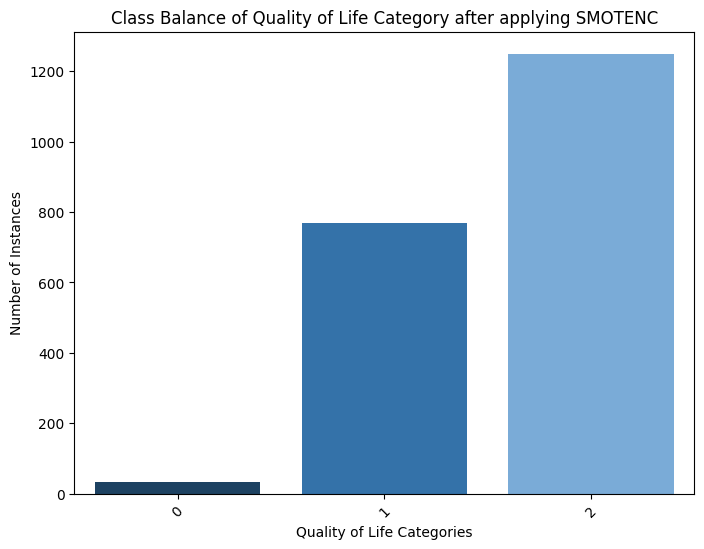

In [129]:
# Define your custom palette with dark blue, dark green, and light green#12436D
custom_palette = sns.color_palette(["#12436D", "#2073BC", "#6BACE6"])  # Dark blue, dark green, light green
plt.figure(figsize=(8, 6))
sns.barplot(x=y_train_resampled.value_counts().index, y=y_train_resampled.value_counts().values, palette=custom_palette)
plt.title('Class Balance of Quality of Life Category after applying SMOTENC')
plt.xlabel('Quality of Life Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

## Implementing a Pipeline to preprocess

In [130]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df_num and df_nominal are already defined DataFrames containing the corresponding features
numerical_features = significant_num# Specify the actual numerical columns
nominal_features = df_nominal  # Specify the actual nominal columns

# Numerical transformer (e.g., scaling numerical features)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Nominal transformer (e.g., one-hot encoding categorical nominal features)
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Create the transformers for ordinal columns
ordinal_transformers = [
    (key, OrdinalEncoder(categories=[custom_orders[key] for i in range(len(globals()[key]))], handle_unknown='use_encoded_value', unknown_value=-1), globals()[key])
    for key in custom_orders.keys()
]

# Using ColumnTransformer to apply different preprocessing steps to numerical, ordinal, and nominal categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nominal', nominal_transformer, nominal_features),
        *ordinal_transformers  # Expanding the list of ordinal transformers
    ]
)

# Define the final pipeline to preprocess the data before fitting the model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [131]:
# Apply preprocessing to training data
X_train_preprocessed = pipeline.fit_transform(X_train_resampled)

In [132]:
# Apply preprocessing to testing data
X_test_preprocessed = pipeline.transform(X_test_new)

### Model fitting

In [133]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [134]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

# Define classifiers with increased max_iter for LogisticRegression
rfc = RandomForestClassifier()
lgbm = LGBMClassifier(verbose=-1)
etc = ExtraTreesClassifier()
xgb = XGBClassifier()
svc = SVC()
lr = LogisticRegression(max_iter=1000)  # Increased max_iter

# Dictionary of classifiers
clf = {'RandomForest': rfc, 'LightGB': lgbm, 'ExtraTrees': etc, 'XGBBoost': xgb, 'SVC': svc, 'LogisticRegression': lr}

# Cross-validation with scaled data
for name, algo in clf.items():
    score = cross_val_score(algo, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("The cv score of {} is:".format(name), score.mean())

The cv score of RandomForest is: 0.7787573437778172
The cv score of LightGB is: 0.765117797163373
The cv score of ExtraTrees is: 0.759756690997567
The cv score of XGBBoost is: 0.7695032935730817
The cv score of SVC is: 0.7690119280754851
The cv score of LogisticRegression is: 0.7514616343243723


In [135]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)

# Base classifiers
estimators = [
    ('RandomForest', RandomForestClassifier()),
    ('LightGB', LGBMClassifier(verbose=-1)),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('XGBoost', XGBClassifier()),
    ('SVC', SVC(probability=True)),
    ('LogisticRegression', LogisticRegression(max_iter=1000))  # Increased max_iter
]

# Meta-classifier
meta_classifier = LogisticRegression(max_iter=1000)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_classifier,
    cv=5,
    passthrough=False
)

# Evaluate the Stacking Classifier using cross-validation with scaled data
score = cross_val_score(stacking_clf, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')

print("The cross-validation accuracy of the Stacking Classifier is:", score.mean())


The cross-validation accuracy of the Stacking Classifier is: 0.7802255059046941


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.65      0.65      0.65       193
           2       0.79      0.80      0.80       312

    accuracy                           0.73       513
   macro avg       0.48      0.48      0.48       513
weighted avg       0.72      0.73      0.73       513



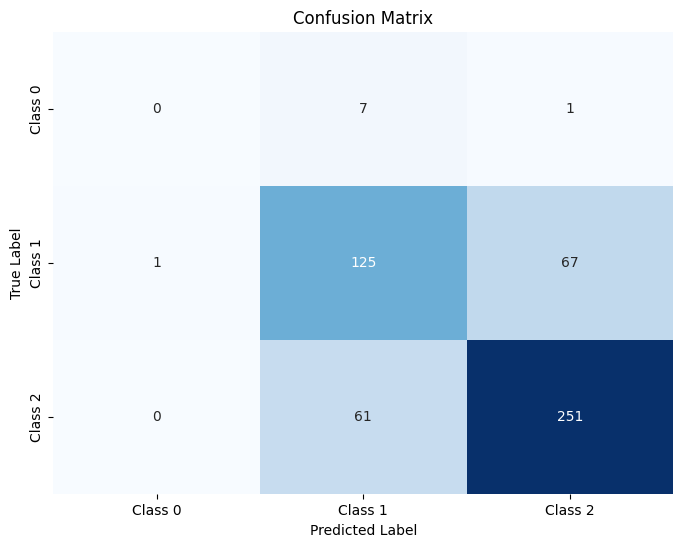

In [136]:
from sklearn.metrics import classification_report, confusion_matrix
# Fit the stacking classifier on the training data
stacking_clf.fit(X_train_preprocessed, y_train_resampled)

# Predict on the test set
y_pred = stacking_clf.predict(X_test_preprocessed)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],  # Change according to your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2'])  # Change according to your class labels

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Fitting  a Random Forest model

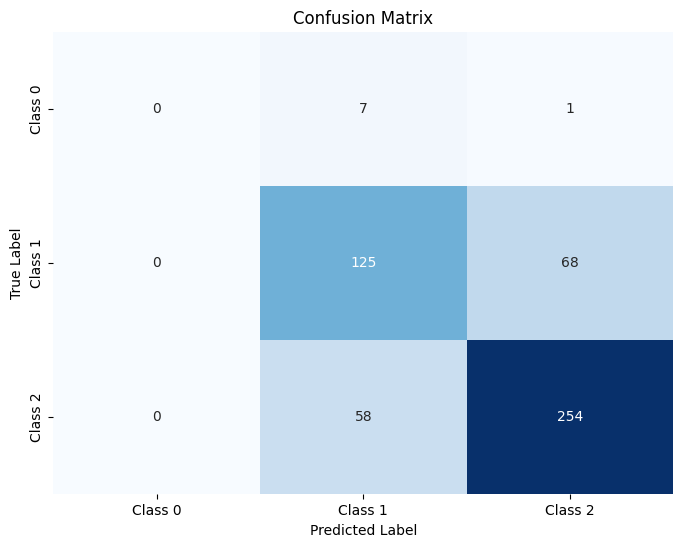

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.66      0.65      0.65       193
           2       0.79      0.81      0.80       312

    accuracy                           0.74       513
   macro avg       0.48      0.49      0.48       513
weighted avg       0.73      0.74      0.73       513



C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

rfc = RandomForestClassifier()
model = rfc.fit(X_train_preprocessed,y_train_resampled)
y_pred = model.predict(X_test_preprocessed)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],  # Change according to your class labels
            yticklabels=['Class 0', 'Class 1', 'Class 2'])  # Change according to your class labels

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optionally, print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

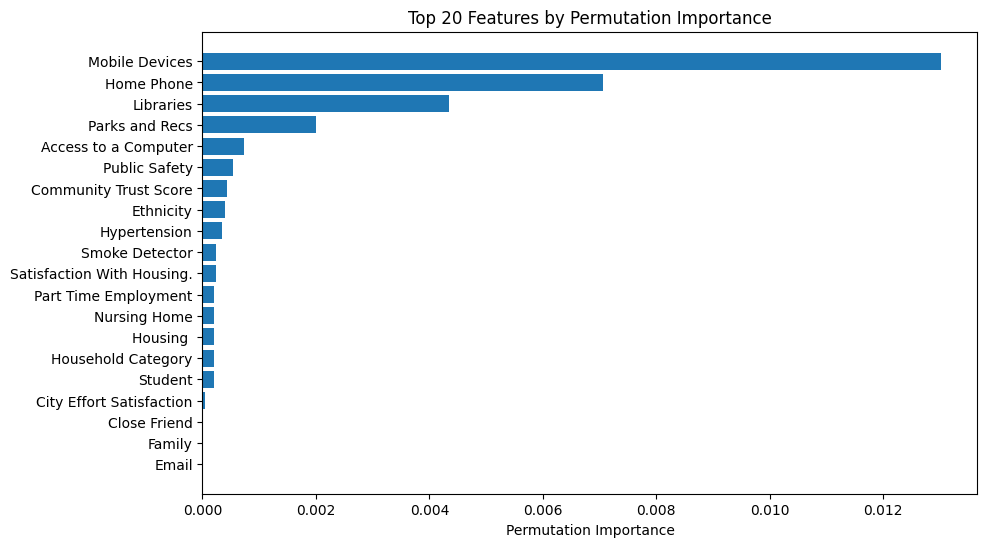

In [138]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
perm_importance = permutation_importance(model, X_train_preprocessed, y_train_resampled, n_repeats=10, random_state=42)

# Sort the feature importances and select the top 20
sorted_idx = perm_importance.importances_mean.argsort()[-20:]  # Get indices for top 20 features

# Plot permutation importance for top 20 variables
plt.figure(figsize=(10, 6))
plt.barh(range(20), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(20), [df.columns[i] for i in sorted_idx])  # Ensure your preprocessed data has column names
plt.xlabel('Permutation Importance')
plt.title('Top 20 Features by Permutation Importance')
plt.show()



In [139]:
# Extract top 20 feature names and their importance scores
top_20_features = [df.columns[i] for i in sorted_idx]
top_20_importances = perm_importance.importances_mean[sorted_idx]

print("Top 20 Features and Their Importance Scores:")
for feature, importance in zip(top_20_features, top_20_importances):
    print(f"{feature}: {importance}")


Top 20 Features and Their Importance Scores:
Email: 0.0
Family: 0.0
Close Friend: 0.0
City Effort Satisfaction: 4.873294346978696e-05
Student: 0.00019493177387914785
Household Category: 0.00019493177387914785
Housing : 0.00019493177387914785
Nursing Home: 0.00019493177387914785
Part Time Employment: 0.00019493177387914785
Satisfaction With Housing.: 0.0002436647173489348
Smoke Detector: 0.0002436647173489348
Hypertension: 0.0003411306042885087
Ethnicity: 0.0003898635477582957
Community Trust Score: 0.00043859649122808265
Public Safety: 0.0005360623781676566
Access to a Computer: 0.0007309941520468044
Parks and Recs: 0.0019980506822612322
Libraries: 0.004337231968810929
Home Phone: 0.00706627680311891
Mobile Devices: 0.013011695906432762


In [140]:
best_features = ['City Effort Satisfaction', 'Ethnicity', 'Access to a Computer', 'Nursing Home', 'Public Safety', 'Home Phone', 'Libraries', 'Parks and Recs', 'Mobile Devices']

14 Variables with Random Forest Model

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get indices for the top 9 features
top_14_idx = sorted_idx[-14:]

# Select top 9 features for training and testing sets
X_train_top14 = X_train_preprocessed[:, top_14_idx]
X_test_top14 = X_test_preprocessed[:, top_14_idx]

# Fit a model using only the top 9 features
model_top14 = RandomForestClassifier(random_state=42)
model_top14.fit(X_train_top14, y_train_resampled)

# Make predictions and evaluate the model
y_pred_top14 = model_top14.predict(X_test_top14)
print("Accuracy:", accuracy_score(y_test, y_pred_top14))
print("Classification Report:\n", classification_report(y_test, y_pred_top14))


Accuracy: 0.7095516569200779
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.62      0.60      0.61       193
           2       0.76      0.80      0.78       312

    accuracy                           0.71       513
   macro avg       0.46      0.46      0.46       513
weighted avg       0.70      0.71      0.70       513



C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tharuka\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### 14 Variables with best Stacking Model

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get indices for the top 9 features
top_14_idx = sorted_idx[-14:]

# Select top 9 features for training and testing sets
X_train_top14 = X_train_preprocessed[:, top_14_idx]
X_test_top14 = X_test_preprocessed[:, top_14_idx]

# Fit a model using only the top 9 features
stacking_clf.fit(X_train_top14, y_train_resampled)

# Make predictions and evaluate the model
y_pred_top14 = stacking_clf.predict(X_test_top14)
print("Accuracy:", accuracy_score(y_test, y_pred_top14))
print("Classification Report:\n", classification_report(y_test, y_pred_top14))


Accuracy: 0.7309941520467836
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.65      0.63      0.64       193
           2       0.78      0.81      0.80       312

    accuracy                           0.73       513
   macro avg       0.48      0.48      0.48       513
weighted avg       0.72      0.73      0.72       513



In [143]:
import pickle

# Assuming stacking_clf is your trained stacking model
# Save the model to a file
with open('stacking_clf.pkl', 'wb') as file:
    pickle.dump(stacking_clf, file)

print("Model saved as stacking_clf.pkl")

Model saved as stacking_clf.pkl


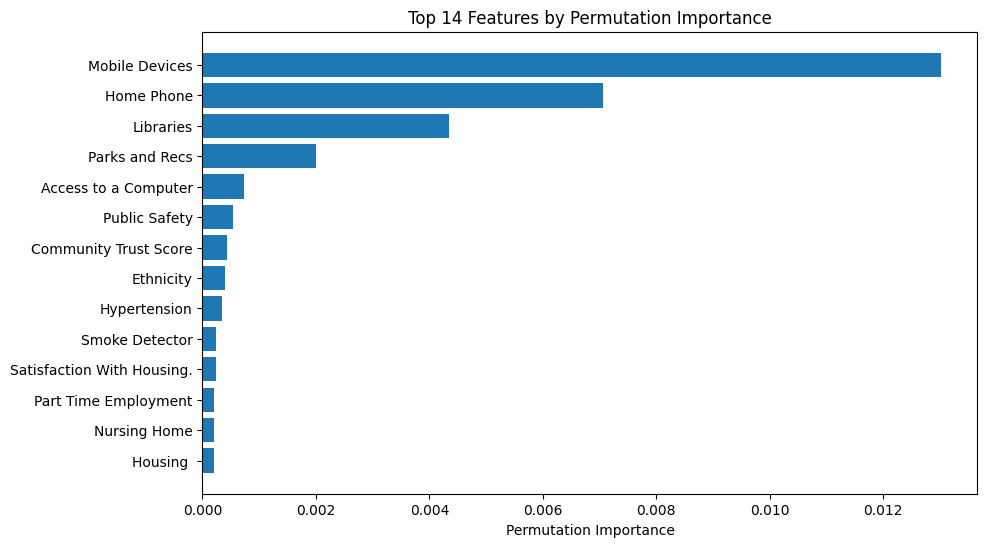

In [144]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
perm_importance = permutation_importance(model, X_train_preprocessed, y_train_resampled, n_repeats=10, random_state=42)

# Sort the feature importances and select the top 14
sorted_idx = perm_importance.importances_mean.argsort()[-14:]  # Get indices for top 14 features

# Store the top 14 feature names in a vector
top_k_features = [df.columns[i] for i in sorted_idx]

# Plot permutation importance for top 14 variables
plt.figure(figsize=(10, 6))
plt.barh(range(14), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(14), top_k_features)  # Use the stored feature names
plt.xlabel('Permutation Importance')
plt.title('Top 14 Features by Permutation Importance')
plt.show()

# Now `top_k_features` contains the names of the top 14 important features


In [145]:
top_k_features

['Housing ',
 'Nursing Home',
 'Part Time Employment',
 'Satisfaction With Housing.',
 'Smoke Detector',
 'Hypertension',
 'Ethnicity',
 'Community Trust Score',
 'Public Safety',
 'Access to a Computer',
 'Parks and Recs',
 'Libraries',
 'Home Phone',
 'Mobile Devices']